# Workshop 8: Polynomial Regression On Anscombe's dataset

## Importing the libraries

In [1]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import arviz as az
from scipy import stats

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Extracting the data and visualising it

  dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33


Text(0, 0.5, 'y')

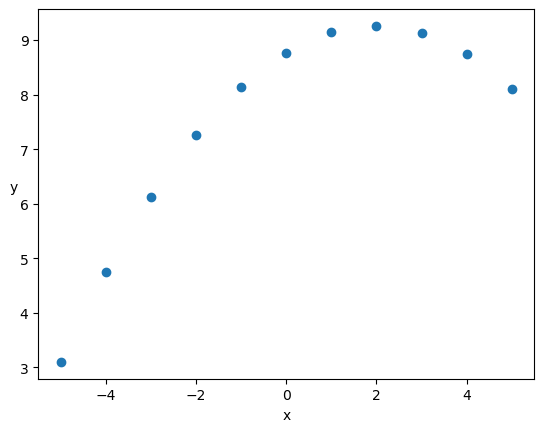

In [2]:
anscombe = sns.load_dataset('anscombe') # loading the dataset
print(anscombe.head())  # checking the dataset
x_2 = anscombe[anscombe.dataset == 'II']['x'].values   # extracting the x values for dataset III
y_2 = anscombe[anscombe.dataset == 'II']['y'].values   # extracting the y values for dataset III
 
x_2 = x_2 - x_2.mean() # centering the x values
plt.scatter(x_2, y_2)
plt.xlabel('x')
plt.ylabel('y', rotation=0)

## Defining The Model

### Quadratic model

In [3]:
with pm.Model() as model_poly:
    α = pm.Normal('α', mu=y_2.mean(), sd=1)
    β1 = pm.Normal('β1', mu=0, sd=1)
    β2 = pm.Normal('β2', mu=0, sd=1)
    ϵ = pm.HalfCauchy('ϵ', 5)
    mu = α + β1 * x_2 + β2 * x_2**2
    y_pred = pm.Normal('y_pred', mu=mu, sd=ϵ, observed=y_2)
    trace_poly = pm.sample(2000, tune=2000)

c:\Users\ahmad\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, β2, β1, α]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 80 seconds.
c:\Users\ahmad\anaconda3\envs\pm3bap\lib\site-packages\arviz\utils.py:175: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


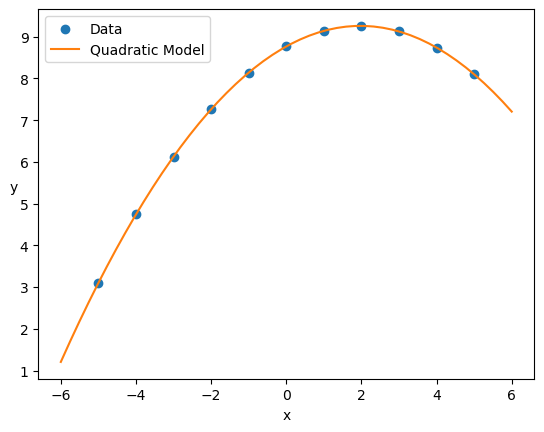

In [9]:
x_p = np.linspace(-6, 6)
y_p_poly = trace_poly['α'].mean() + trace_poly['β1'].mean() * x_p + trace_poly['β2'].mean() * x_p**2
x_p + trace_poly['β2'].mean() * x_p**2
plt.scatter(x_2, y_2,label='Data')
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.plot(x_p, y_p_poly, c='C1', label='Quadratic Model')
plt.legend()
plt.show()

### Cubic Model

In [5]:
with pm.Model() as model_cubic:
    α = pm.Normal('α', mu=y_2.mean(), sd=1)
    β1 = pm.Normal('β1', mu=0, sd=1)
    β2 = pm.Normal('β2', mu=0, sd=1)
    β3 = pm.Normal('β3', mu=0, sd=1)
    ϵ = pm.HalfCauchy('ϵ', 5)
    mu = α + β1 * x_2 + β2 * x_2**2 + β3 * x_2**3
    y_pred = pm.Normal('y_pred', mu=mu, sd=ϵ, observed=y_2)
    trace_cubic = pm.sample(2000, tune=2000)

c:\Users\ahmad\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, β3, β2, β1, α]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 75 seconds.
There were 12 divergences after tuning. Increase `target_accept` or reparameterize.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
There were 17 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


### Visualising cubic model

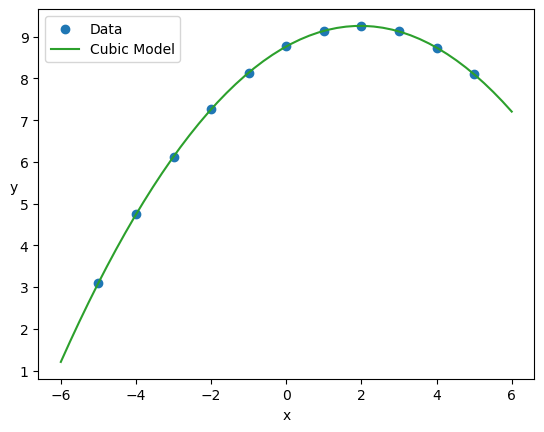

In [6]:
x_p = np.linspace(-6, 6)
y_p_cubic = trace_cubic['α'].mean() + trace_cubic['β1'].mean() * x_p + trace_cubic['β2'].mean() * x_p**2 + trace_cubic['β3'].mean() * x_p**3

plt.scatter(x_2, y_2, label='Data')
plt.plot(x_p, y_p_cubic, c='C2', label='Cubic Model')
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend()
plt.show()


### Comparing both the models (check and see if this is correct or not)

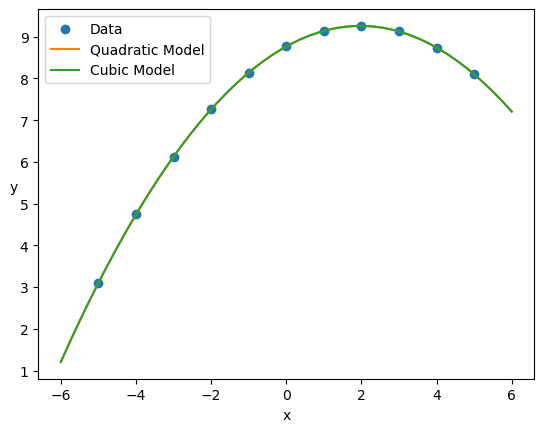

In [7]:
x_p = np.linspace(-6, 6)
y_p_poly = trace_poly['α'].mean() + trace_poly['β1'].mean() * x_p + trace_poly['β2'].mean() * x_p**2
y_p_cubic = trace_cubic['α'].mean() + trace_cubic['β1'].mean() * x_p + trace_cubic['β2'].mean() * x_p**2 + trace_cubic['β3'].mean() * x_p**3

plt.scatter(x_2, y_2, label='Data')
plt.plot(x_p, y_p_poly, c='C1', label='Quadratic Model')
plt.plot(x_p, y_p_cubic, c='C2', label='Cubic Model')
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend()
plt.show()


### Final Remarks <hr/>

As you can see from the graph, the linear model is inappropriate for this case, as linear models can only capture linear patterns, so they struggle to fit data with higher-order relationships like quadratic or cubic patterns

It's important to choose a model that aligns with the inherent patterns in your data for accurate and meaningful predictions.